In [ ]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
wine= pd.read_csv('drive/My Drive/winequality-red.csv')
wine

Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1599,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1600,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1601,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1602,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1603 non-null   float64
 1   volatile acidity      1601 non-null   float64
 2   citric acid           1601 non-null   float64
 3   residual sugar        1603 non-null   float64
 4   chlorides             1601 non-null   float64
 5   free sulfur dioxide   1602 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1601 non-null   float64
 8   pH                    1602 non-null   float64
 9   sulphates             1600 non-null   float64
 10  alcohol               1601 non-null   float64
 11  quality               1604 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.5 KB


In [ ]:
wine = wine.dropna()

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1603
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


==> Tập dữ liệu bao gồm 1599 hàng và 12 cột không có cột nào null

In [ ]:
#Kiểm tra giá trị trùng lặp
wine.duplicated().sum()

240

In [ ]:
#Xóa các dòng dữ liệu bị trùng 
wine.drop_duplicates(inplace = True)
wine.shape

(1359, 12)

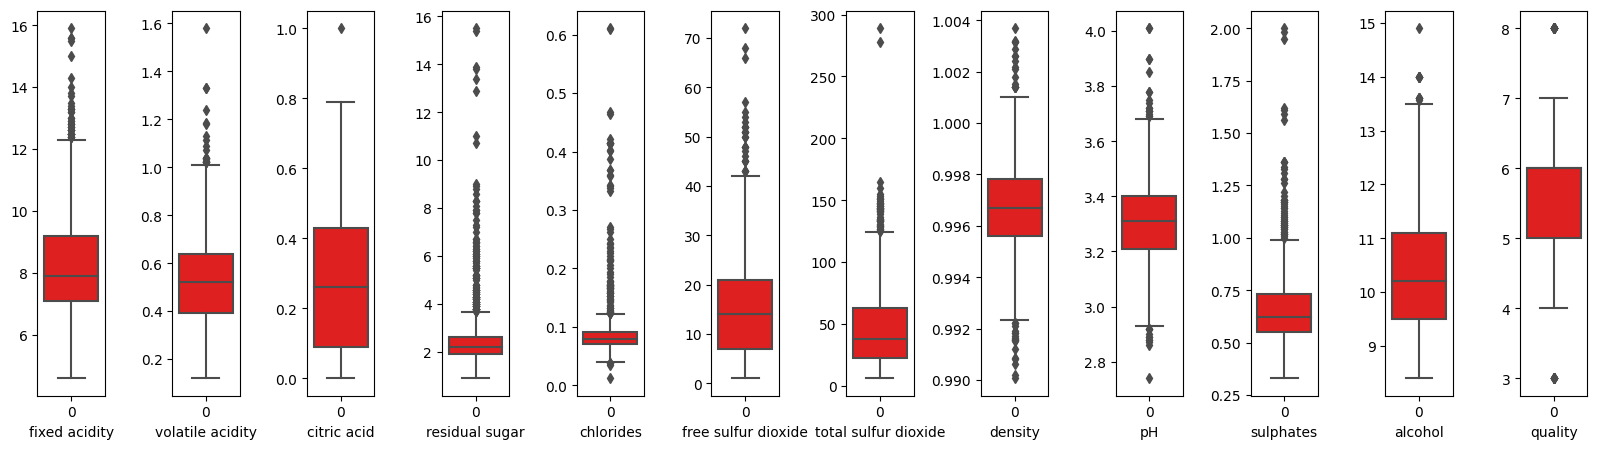

In [ ]:
#Kiểm tra cái giá trị ngoại lai bằng biểu đồ Boxplot (biểu đồ hộp)
cols = wine.columns.values
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(20,5))

for i, col in enumerate(cols):
    sns.boxplot(wine[col], whis=1.5, color='red', orient='w', ax=axes[i])
    axes[i].set_xlabel(col)

plt.subplots_adjust(wspace=1)
plt.show()

In [ ]:
wine.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.000000,8.310596,1.736990,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1359.000000,0.529478,0.183031,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1359.000000,0.272333,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residual sugar,1359.000000,2.523400,1.352314,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1359.000000,0.088124,0.049377,0.012000,0.070000,0.079000,0.091000,0.611000
free sulfur dioxide,1359.000000,15.893304,10.447270,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1359.000000,46.825975,33.408946,6.000000,22.000000,38.000000,63.000000,289.000000
density,1359.000000,0.996709,0.001869,0.990070,0.995600,0.996700,0.997820,1.003690
pH,1359.000000,3.309787,0.155036,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1359.000000,0.658705,0.170667,0.330000,0.550000,0.620000,0.730000,2.000000


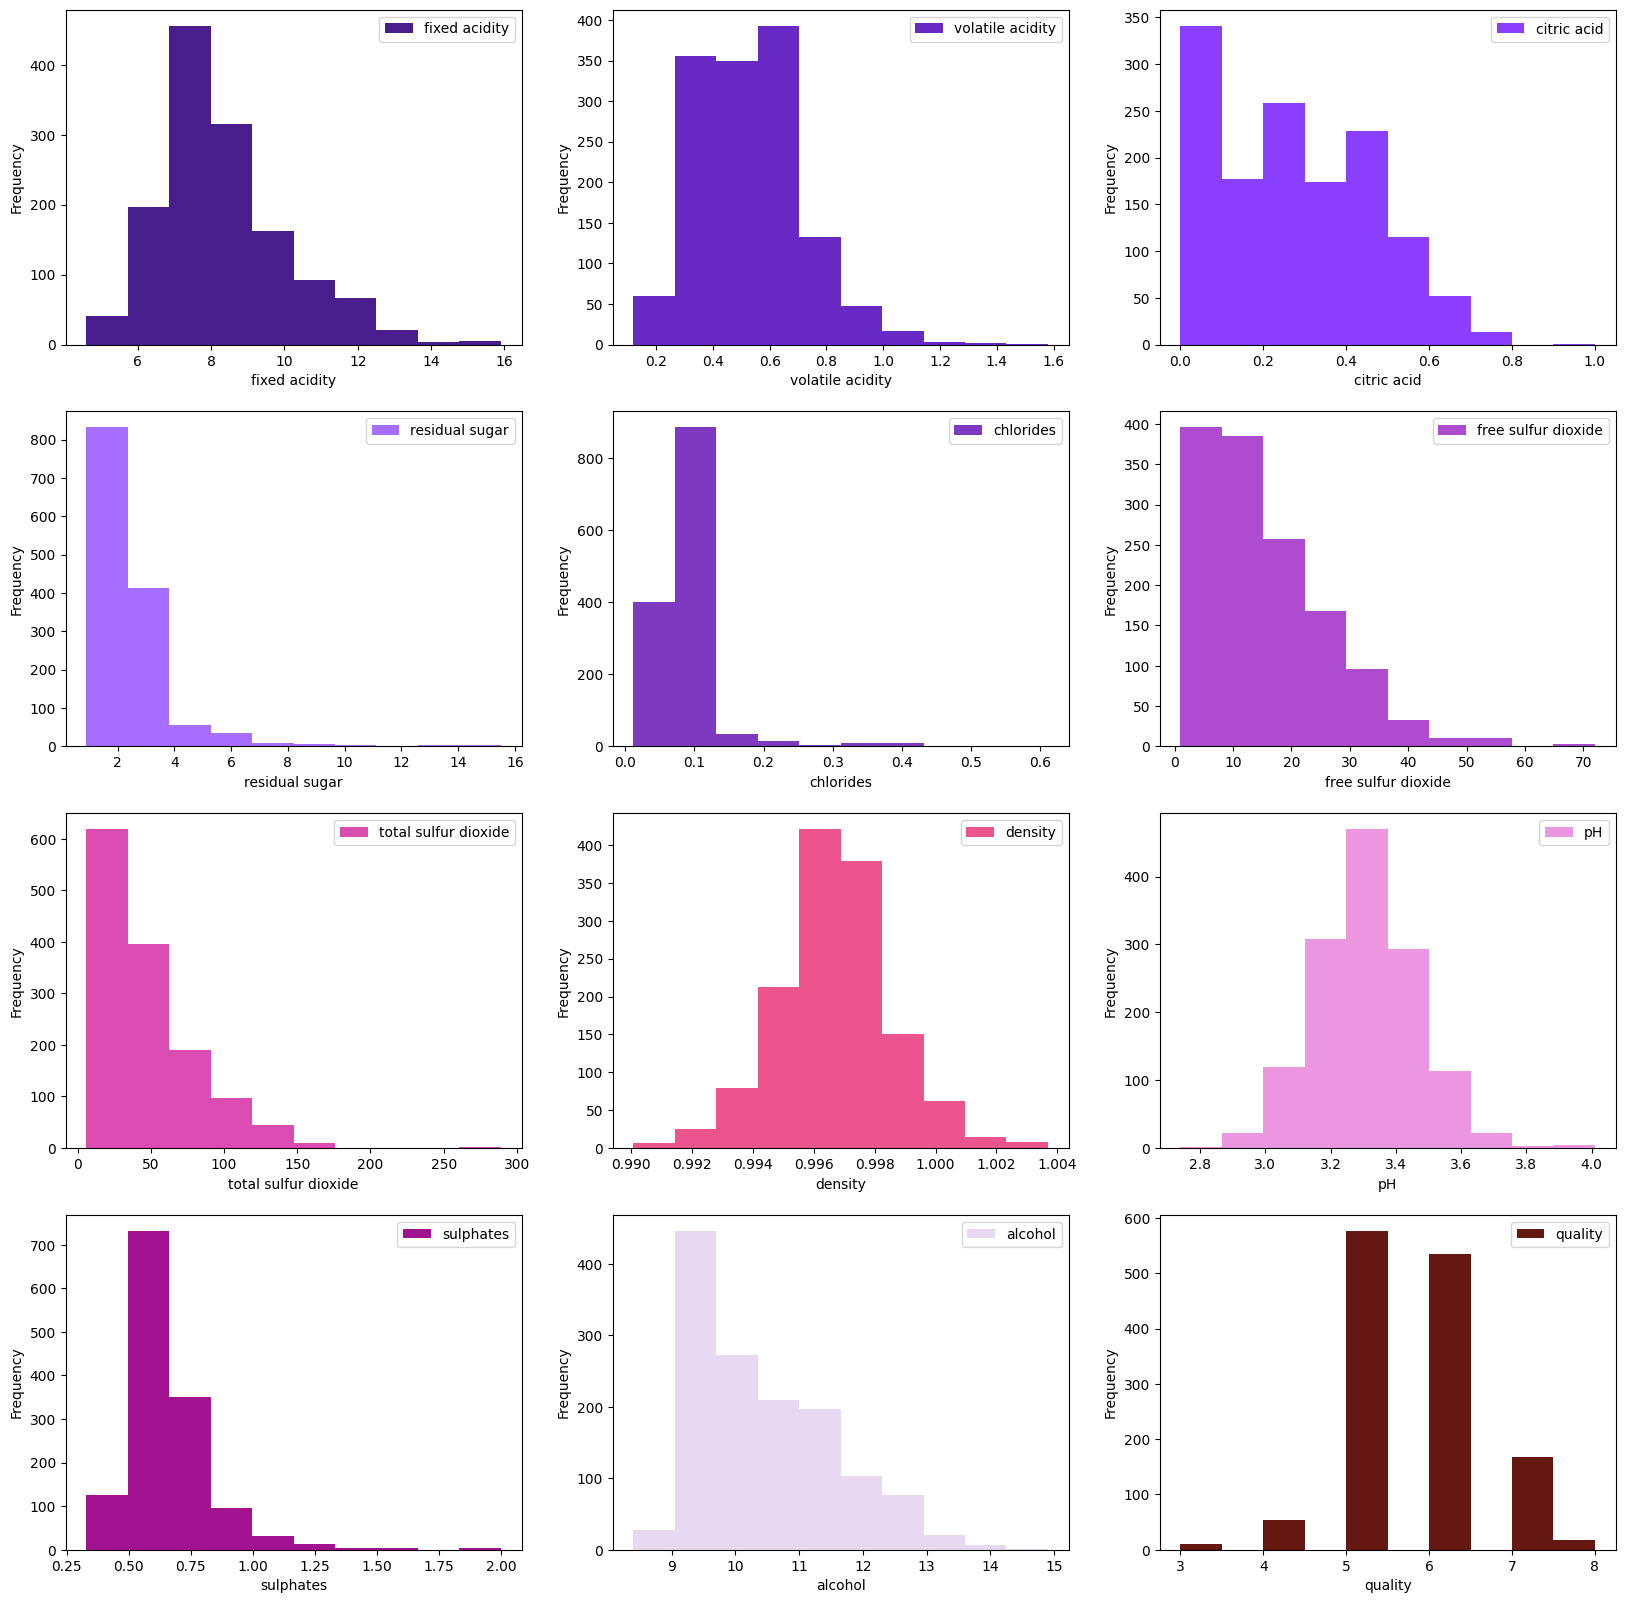

In [ ]:
#Biểu đồ histogram hiển thị đặc tính phân bố của các thuộc tính trong dataframe
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(wine.columns):
    ax = axes.flatten()[index]
    ax.hist(wine[column], color = colors[index], label = column)
    ax.legend(loc = "best")
    ax.set_xlabel(column) # Add x-label
    ax.set_ylabel('Frequency') # Add y-label


plt.show()

<Axes: xlabel='quality', ylabel='fixed acidity'>

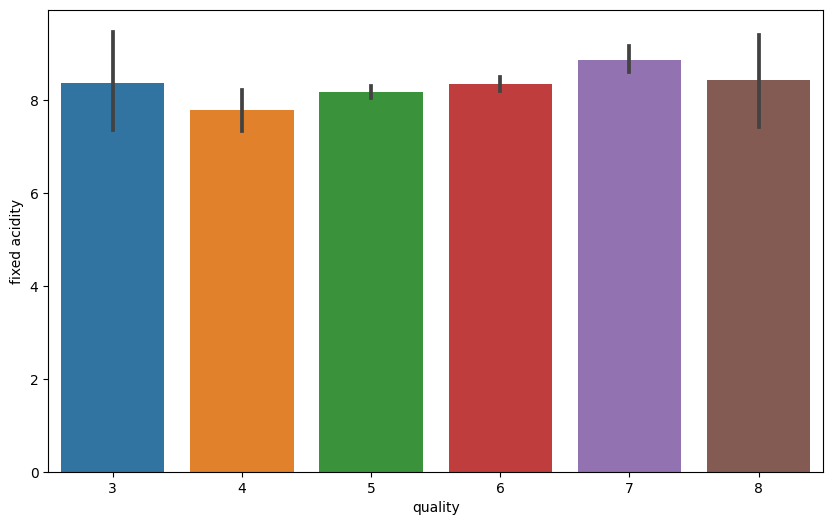

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
#có xu hướng tăng nhẹ đi chất lượng rượu tăng

<Axes: xlabel='quality', ylabel='volatile acidity'>

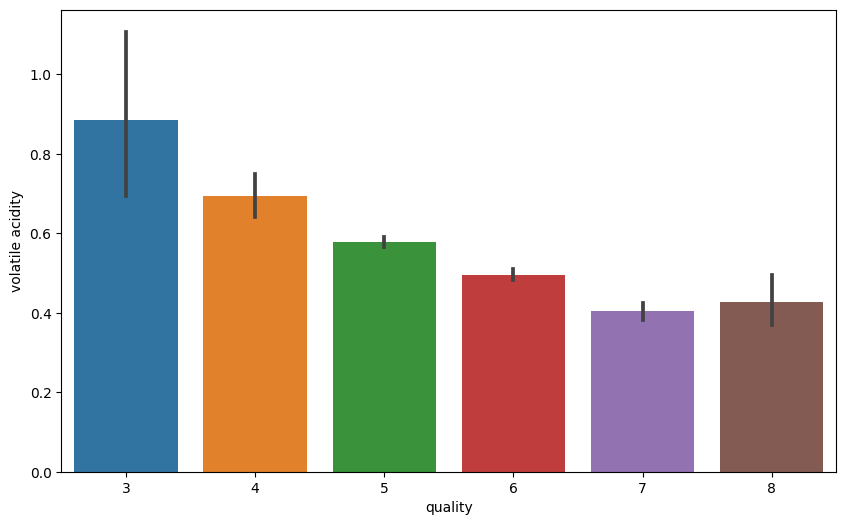

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
#Chúng ta thấy rằng độ axit dễ bay hơi có xu hướng giảm dần khi chúng ta nâng cao chất lượng, nghĩa là rượu ngon thì ít bay hơi là cố tính tương quan âm 

<Axes: xlabel='quality', ylabel='citric acid'>

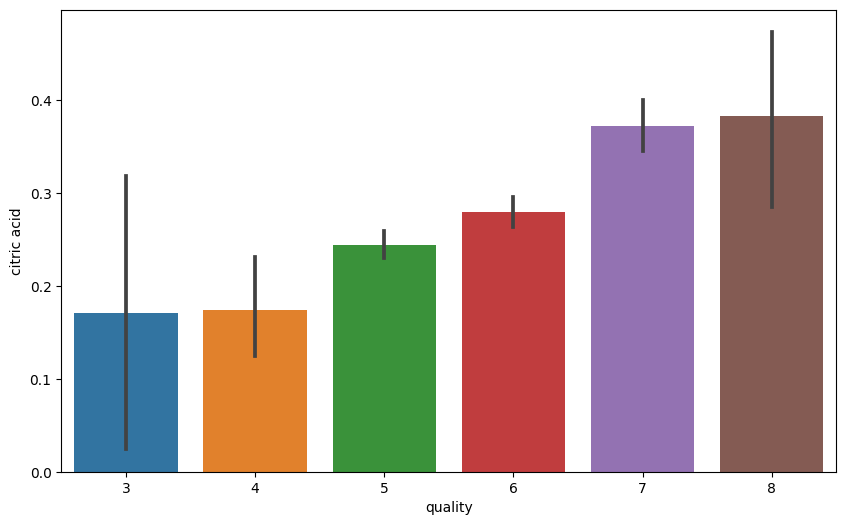

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
#Thành phần axit citric càng cao thì chất lượng rượu càng cao

<Axes: xlabel='quality', ylabel='residual sugar'>

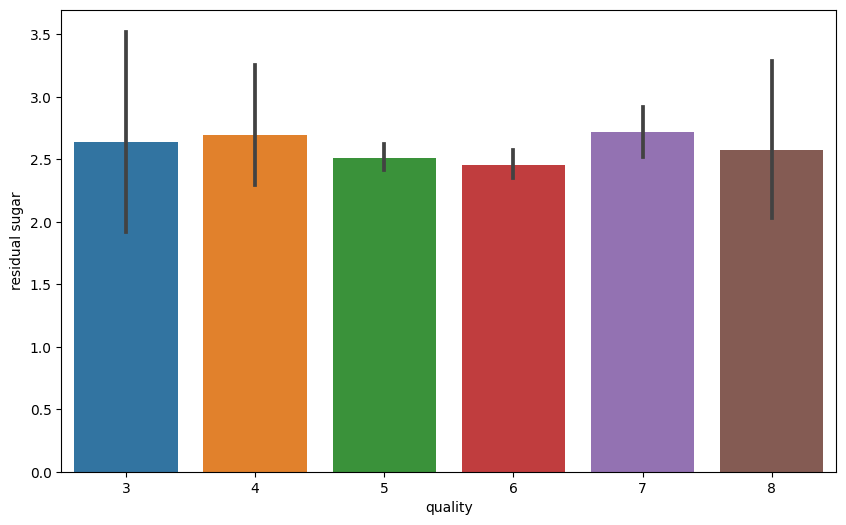

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
#Nồng độ đường tương đối, không quá cao cũng không quá thấp, khoảng từ 2.5 trở lên


<Axes: xlabel='quality', ylabel='chlorides'>

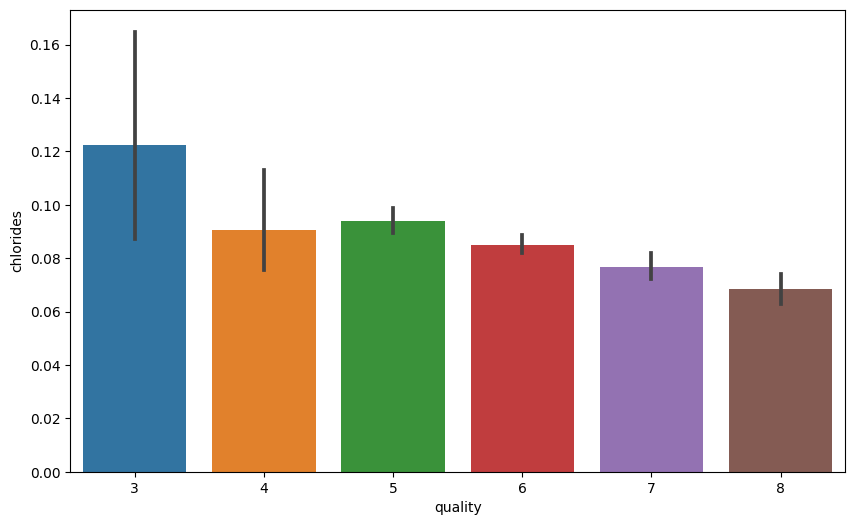

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
#Thành phần clorua cũng giảm xuống khi chất lượng rượu vang nâng cao

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

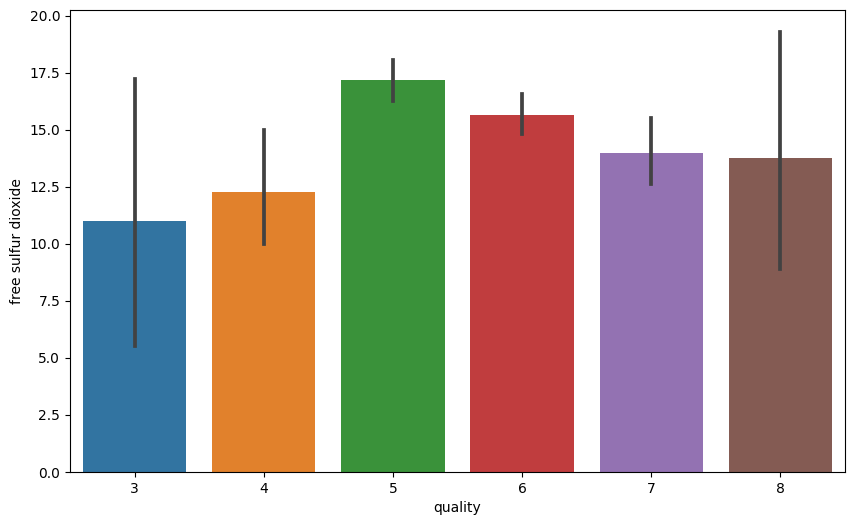

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

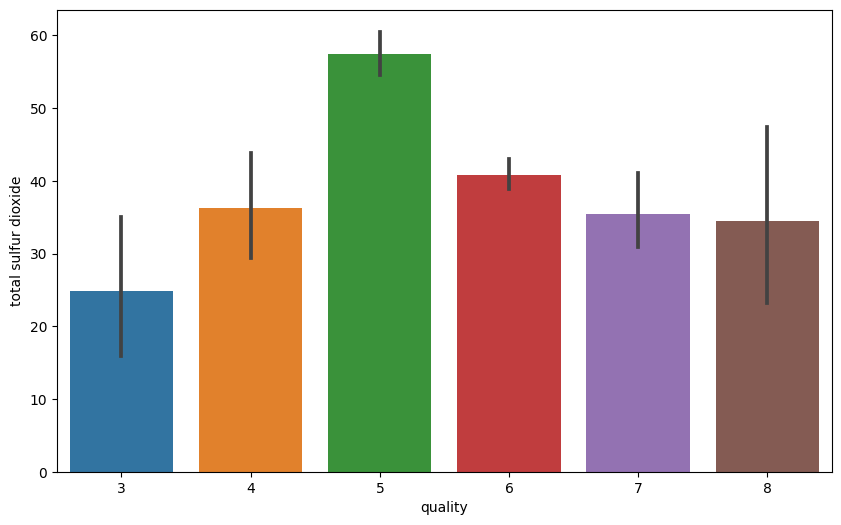

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

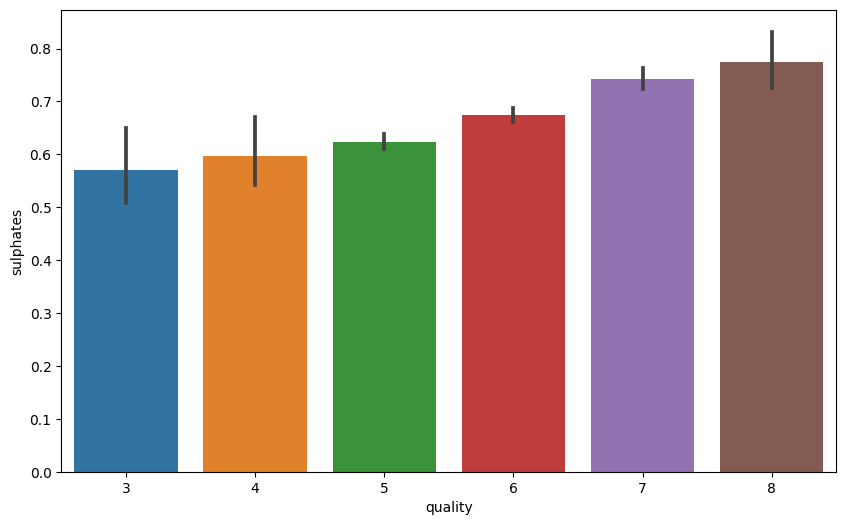

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
#Mức độ sunfat sẽ tỉ lệ thuận với chất lượng của rượu vang

<Axes: xlabel='quality', ylabel='alcohol'>

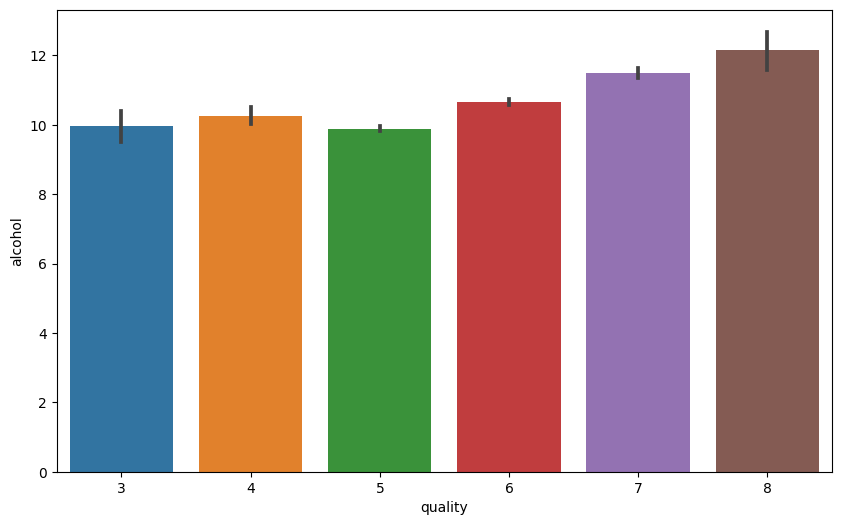

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
#Độ cồn cũng tăng cao hơn khi chất lượng rượu tăng lên

<Axes: xlabel='quality'>

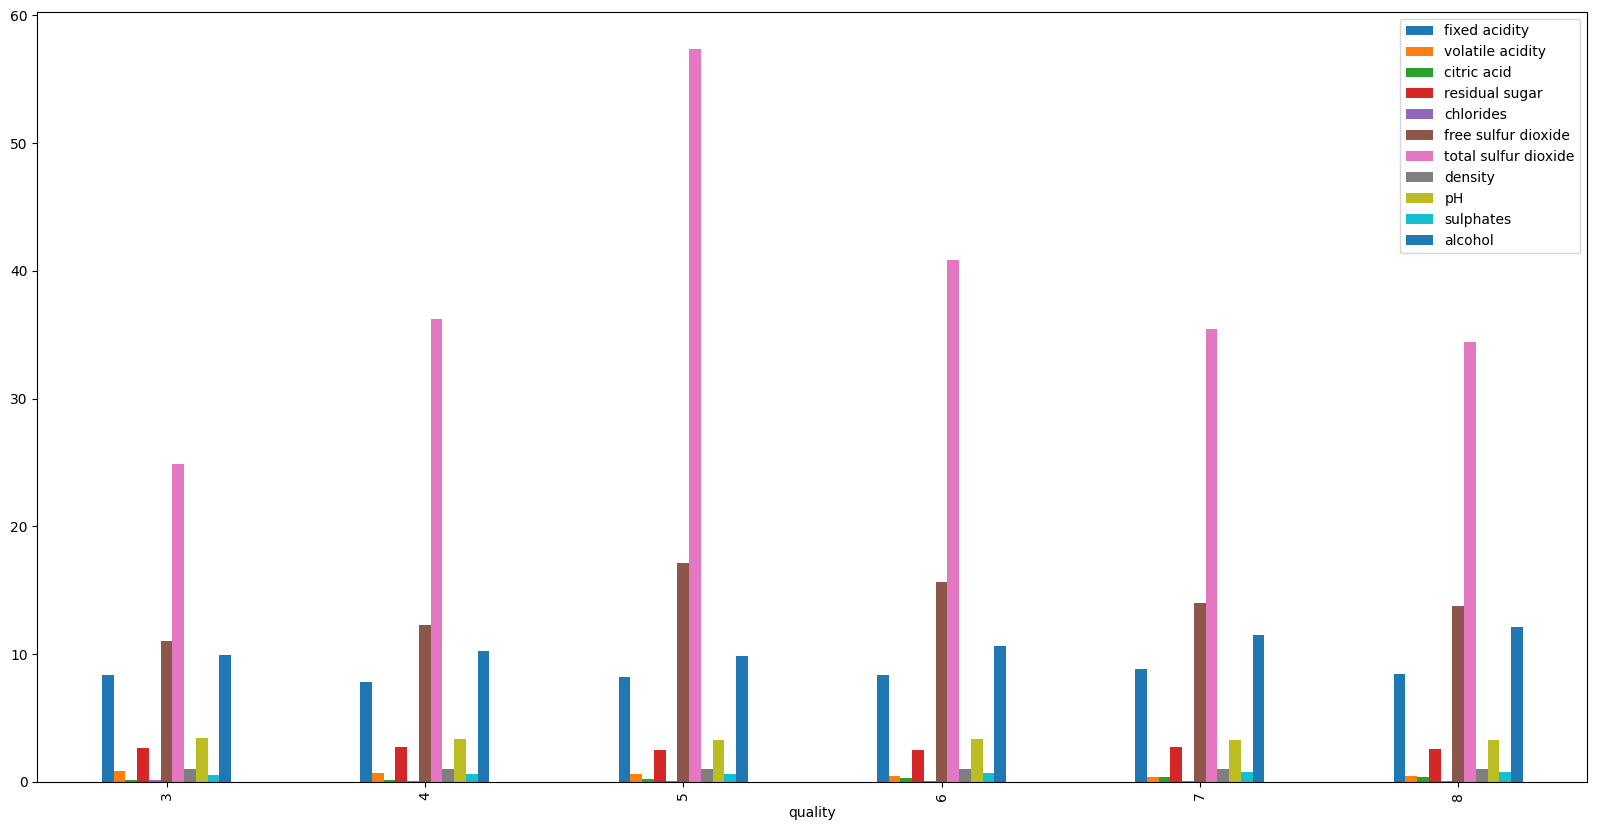

In [ ]:
aa = wine.groupby("quality").mean()
aa
aa.plot(kind="bar",figsize=(20,10))

In [ ]:
fig = px.scatter(wine, x="total sulfur dioxide", y="free sulfur dioxide", color=wine['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')
# tổng lượng sulfur dioxide cao hơn thì giá trị sulfur dioxide tự do cao hơn, mức tương quan cao(free sulfur dioxide phụ thuộc vào total sulfur dioxide)


In [ ]:
fig = px.scatter(wine, x="fixed acidity", y="density", color=wine['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')
# mức axit cố định cao hơn là giá trị tỉ trọng cao hơn, tương quan dương (nhẹ)


In [ ]:
fig = px.scatter(wine, x="volatile acidity", y="citric acid", color=wine['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')
#chất điều chỉnh độ axit và độ axit dễ bay hơi có mối tương quan nghịch đảo 



In [ ]:
fig = px.scatter(wine, x="alcohol", y="chlorides", color=wine['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')
#tương quan nghịch

In [ ]:
fig = px.scatter(wine, x="pH", y="citric acid", color=wine['quality'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='Quality')

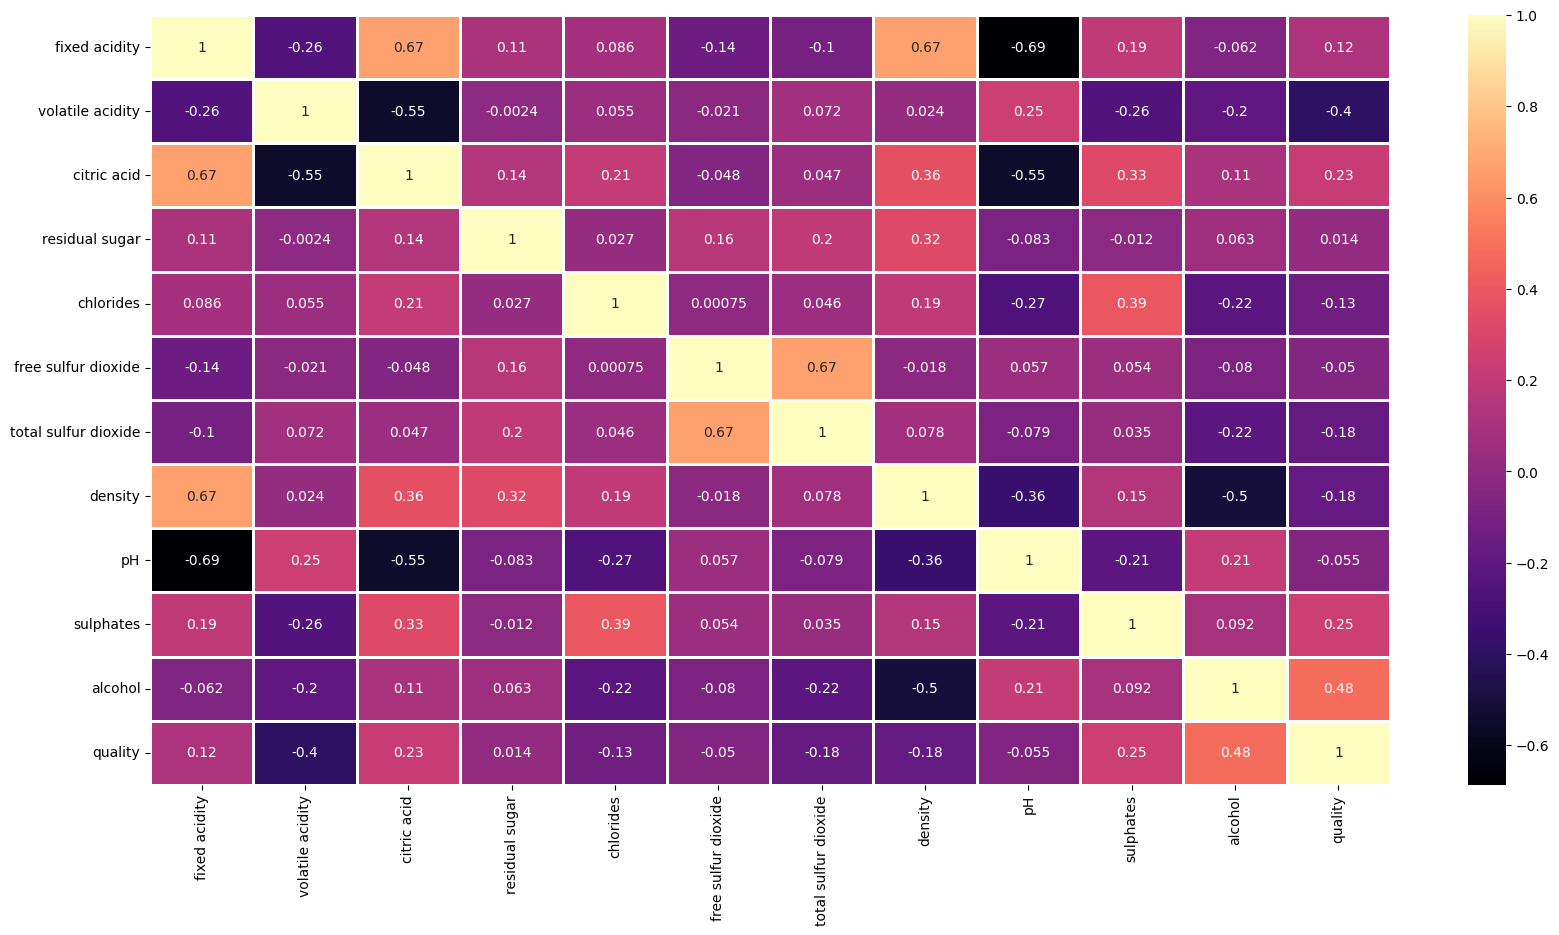

In [ ]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(wine.corr(), annot = True, linewidths = 2, cmap = "magma");
#bảng dữ liệu tương quan giữa các thuộc tính

In [ ]:
fig = go.Figure(data=[go.Pie(labels=wine['quality'].value_counts().index, values=wine['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

In [ ]:
# chuẩn hóa dữ liệu dưới dạng nhị phân, phạm vi chất lượng nằm trong khoảng từ 3 đến 8 nên ta sẽ quy ước phân loại rượu thành 2 loại : ngon(có chất lượng từ 6->8), không ngon(có chất lượng từ 3-5)
wine["quality"] = np.where(wine["quality"] > 5, 1, 0)
wine["quality"]


0       0
1       0
2       0
3       1
5       0
       ..
1598    1
1599    0
1600    1
1602    0
1603    1
Name: quality, Length: 1359, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=wine['quality'].value_counts().index, values=wine['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

In [ ]:
wine.head().style.background_gradient(cmap = "Reds")
#Kiểm tra dữ liệu lần cuối trước khi máy học

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,0


In [ ]:
y = wine["quality"]
x = wine.drop("quality", axis = 1)
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)


In [ ]:









print(x_train)
print(x_test)
print(y_train)
print(y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
293             8.7              0.52         0.09             2.5      0.091   
87              7.4              0.50         0.47             2.0      0.086   
265             7.9              0.33         0.23             1.7      0.077   
512            11.2              0.67         0.55             2.3      0.084   
577            10.2              0.24         0.49             2.4      0.075   
...             ...               ...          ...             ...        ...   
833             7.8              0.57         0.09             2.3      0.065   
1068           10.2              0.29         0.65             2.4      0.075   
1291            7.1              0.16         0.44             2.5      0.068   
272             7.9              0.35         0.46             3.6      0.078   
1250            7.4              0.55         0.19             1.8      0.082   

      free sulfur dioxide  

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
wine = LogisticRegression()

In [ ]:
wine.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
wine2 = LogisticRegression(max_iter=1000)

In [ ]:
wine2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
wine3 = LogisticRegression(solver="liblinear",max_iter=1000)

In [ ]:
wine3.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

wine4 = LogisticRegression(max_iter=1000)
wine4.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions= wine.predict(x_test)
from sklearn.metrics import classification_report
classification_report(y_test,predictions)


'              precision    recall  f1-score   support\n\n           0       0.65      0.70      0.67       155\n           1       0.73      0.68      0.70       185\n\n    accuracy                           0.69       340\n   macro avg       0.69      0.69      0.69       340\nweighted avg       0.69      0.69      0.69       340\n'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[108,  47],
       [ 59, 126]])

ma trận nhầm lẫn (confusion matrix) giữa nhãn thực tế (y_test) và nhãn dự đoán (predictions) của mô hình logistic regression được huấn luyện trên tập dữ liệu huấn luyện và được kiểm thử trên tập dữ liệu kiểm thử.

Kết quả trả về là một ma trận kích thước 2x2, trong đó:

Ô trên trái là số lượng dữ liệu được dự đoán đúng là positive (1) và thực tế cũng là positive.

Ô trên phải là số lượng dữ liệu được dự đoán sai là positive (1) nhưng thực tế là negative (0).

Ô dưới trái là số lượng dữ liệu được dự đoán sai là negative (0) nhưng thực tế là positive (1).

Ô dưới phải là số lượng dữ liệu được dự đoán đúng là negative (0) và thực tế cũng là negative.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6882352941176471